In [1]:
import time
#basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


#word modeling
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

import warnings

warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings('ignore',message="Precision")

In [2]:
#load data
papers= pd.read_csv('abstracts_text.csv')
papers.head(5)

,Subject,abstract
0,white,The determinants of transnational entreprene...
1,white,Market orientation and strategic decisions on...
2,white,Diaspora networks in international business: ...
3,green,Typology of diaspora entrepreneurship: Case ...
4,white,Diaspora networks in international business ...


In [3]:
# Load the regular expression library
import re
# Remove punctuation
papers['abstract_processed'] = \
papers['abstract'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['abstract_processed'] = \
papers['abstract_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['abstract_processed'].head()

0      the determinants of transnational entreprene...
1     market orientation and strategic decisions on...
2     diaspora networks in international business: ...
3      typology of diaspora entrepreneurship: case ...
4      diaspora networks in international business ...
Name: abstract_processed, dtype: object

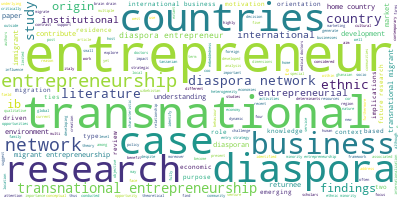

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['abstract_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.abstract_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['determinants', 'transnational', 'transnational', 'ties', 'dynamics', 'among', 'immigrant', 'entrepreneurs', 'ict', 'sector', 'italy', 'article', 'contributes', 'rapidly', 'growing', 'literature', 'transnational', 'immigrant', 'analyzing', 'determinants', 'transnational', 'entrepreneurial', 'engagement', 'among', 'immigrants', 'ict', 'sector', 'italy', 'investigate', 'factors']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dbandara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2), (10, 2), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1)]


In [7]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.043*"transnational" + 0.018*"entrepreneurs" + 0.015*"migrant" + '
  '0.013*"business" + 0.013*"networks" + 0.012*"research" + 0.011*"country" + '
  '0.010*"countries" + 0.009*"case" + 0.007*"home"'),
 (1,
  '0.019*"entrepreneurs" + 0.014*"transnational" + 0.012*"diaspora" + '
  '0.008*"ethnic" + 0.008*"countries" + 0.008*"business" + 0.007*"market" + '
  '0.007*"orientation" + 0.007*"case" + 0.007*"study"'),
 (2,
  '0.025*"transnational" + 0.012*"entrepreneurs" + 0.010*"country" + '
  '0.009*"entrepreneurial" + 0.009*"doctors" + 0.008*"italy" + '
  '0.008*"diaspora" + 0.008*"immigrant" + 0.008*"among" + 0.007*"ties"'),
 (3,
  '0.020*"diaspora" + 0.019*"countries" + 0.019*"entrepreneurs" + '
  '0.014*"returnee" + 0.009*"paper" + 0.009*"uzbekistan" + 0.008*"business" + '
  '0.008*"networks" + 0.008*"research" + 0.008*"case"'),
 (4,
  '0.024*"transnational" + 0.017*"literature" + 0.014*"ethnic" + '
  '0.011*"minority" + 0.011*"cases" + 0.009*"diaspora" + 0.009*"west" + '
  '0.00

In [8]:
#find which topic a document belongs to
for i in range(len(papers)):
    text = [word for word in papers.abstract_processed[i].split()]
    bow = id2word.doc2bow(text)
    print ("document", i, "is about", lda_model.get_document_topics(bow))
#topic 2 seems not useful for analysis

document 0 is about [(2, 0.9854822)]
document 1 is about [(1, 0.9896527)]
document 2 is about [(7, 0.9909979)]
document 3 is about [(3, 0.99042314)]
document 4 is about [(7, 0.9912598)]
document 5 is about [(6, 0.98676276)]
document 6 is about [(6, 0.9927988)]
document 7 is about [(4, 0.99279857)]
document 8 is about [(0, 0.9931684)]
document 9 is about [(3, 0.993615)]
document 10 is about [(7, 0.9896539)]
document 11 is about [(5, 0.9844794)]
document 12 is about [(0, 0.13913219), (6, 0.8516697)]
document 13 is about [(0, 0.43626624), (7, 0.5537318)]
document 14 is about [(0, 0.99217284)]
document 15 is about [(0, 0.993232)]
document 16 is about [(8, 0.9839276)]
document 17 is about [(0, 0.98902214)]
document 18 is about [(9, 0.983017)]
document 19 is about [(4, 0.986763)]


In [9]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\dbandara\Dropbox (Fairfield University)\Research\code\util_scripts\.venv\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.048970  0.076931       1        1  26.844349
7     -0.014382  0.013226       2        1  17.324453
6      0.122145 -0.023864       3        1  15.217675
3     -0.007785  0.002322       4        1  13.067288
4     -0.036028 -0.063997       5        1  10.191697
1      0.041409  0.028628       6        1   4.994362
5     -0.002543  0.018715       7        1   3.380077
2      0.035269  0.022911       8        1   3.178313
9     -0.031453 -0.064039       9        1   2.926108
8     -0.057662 -0.010832      10        1   2.875676, topic_info=              Term       Freq      Total Category  logprob  loglift
41   transnational  38.000000  38.000000  Default  30.0000  30.0000
689        migrant  10.000000  10.000000  Default  29.0000  29.0000
99        research  16.000000  16.000000  Default  28.0000  28.0000
128       diaspora  32.000000  32.000000  Default  27.0000  27.0000
66          ethnic  13.000000  13.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
27      literature   0.347733   9.180352  Topic10  -5.0993   0.2755
43            aims   0.279720   3.005782  Topic10  -5.3169   1.1744
146   implications   0.289691   4.726337  Topic10  -5.2819   0.7568
116      attention   0.254889   2.272072  Topic10  -5.4099   1.3613
583       returnee   0.255924   6.830620  Topic10  -5.4059   0.2646

[591 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
756       1  0.454264         abroad
673       1  0.313091  acculturation
673       2  0.313091  acculturation
410       5  0.741507       achieved
703       1  0.598538         across
...     ...       ...            ...
110       4  0.306417         within
862       1  0.709284          women
246       1  0.255473            yet
246       4  0.255473            yet
246       5  0.255473            yet

[544 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 7, 4, 5, 2, 6, 3, 10, 9])